<a href="https://colab.research.google.com/github/RigoArias/MetodosComputacionales_RigoArias_DarcyGaleano/blob/main/Tarea%205/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

mu_real = 10
sigma_real = 2
n = 30
datos = np.random.normal(mu_real, sigma_real, n)
mu_estimado = np.mean(datos)
sigma2_estimado = np.var(datos)

Hessian = np.array([[-n / sigma2_estimado, 0],[0, -n / (2 * sigma2_estimado ** 2)]])
print("Estimador de mu:", mu_estimado)
print("Estimador de sigma^2:", sigma2_estimado)
print("Matriz Hessiana evaluada en los estimadores:")
print(Hessian)


Estimador de mu: 10.96289593582838
Estimador de sigma^2: 3.5314580476788566
Matriz Hessiana evaluada en los estimadores:
[[-8.49507472  0.        ]
 [ 0.         -1.20277158]]


Esta matriz definida es negativa


Tasa de aceptación: 0.27905
Estimación de mu: 4.015600278825495
Intervalo de confianza de mu (68%): [3.8232765  4.20185352]
Estimación de sigma: 1.8431482616127033
Intervalo de confianza de sigma (68%): [1.70480144 1.97599152]


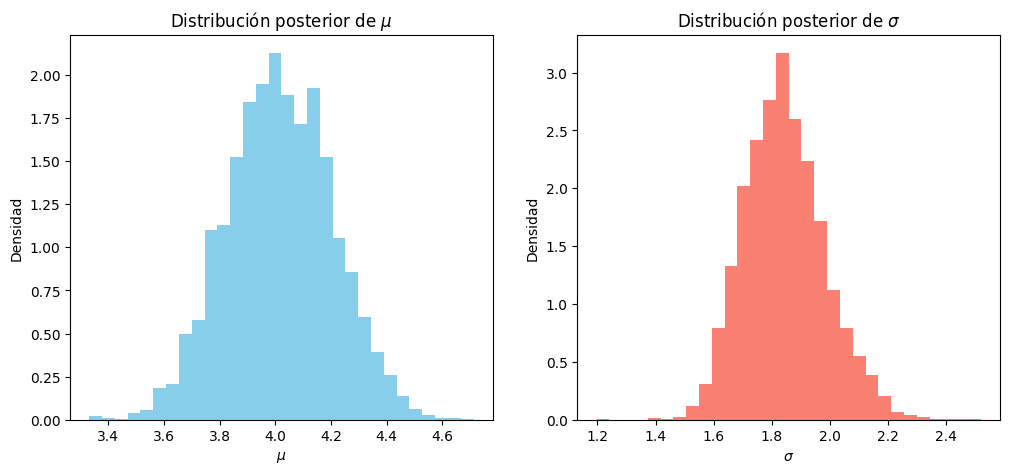

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'
df = pd.read_csv(url)
datos = df['x'].values

def log_likelihood(mu, sigma, datos):
    n = len(datos)
    return -0.5 * n * np.log(2 * np.pi * sigma**2) - np.sum((datos - mu)**2) / (2 * sigma**2)
def log_prior(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 0
    else:
        return -np.inf
def log_posterior(mu, sigma, datos):
    return log_likelihood(mu, sigma, datos) + log_prior(mu, sigma)

def metropolis_hastings(datos, mu_init=4, sigma_init=1, n_iter=20000):
    mu_current = mu_init
    sigma_current = sigma_init
    samples = []
    accepted = 0

    for _ in range(n_iter):

        mu_proposal = np.random.normal(mu_current, 0.5)
        sigma_proposal = np.abs(np.random.normal(sigma_current, 0.2))


        log_post_current = log_posterior(mu_current, sigma_current, datos)
        log_post_proposal = log_posterior(mu_proposal, sigma_proposal, datos)


        if np.log(np.random.rand()) < (log_post_proposal - log_post_current):
            mu_current, sigma_current = mu_proposal, sigma_proposal
            accepted += 1

        samples.append((mu_current, sigma_current))

    print("Tasa de aceptación:", accepted / n_iter)
    return np.array(samples)

samples = metropolis_hastings(datos)
mu_samples = samples[:, 0]
sigma_samples = samples[:, 1]
mu_estimate = np.mean(mu_samples)
sigma_estimate = np.mean(sigma_samples)
mu_conf_int = np.percentile(mu_samples, [16, 84])
sigma_conf_int = np.percentile(sigma_samples, [16, 84])

print("Estimación de mu:", mu_estimate)
print("Intervalo de confianza de mu (68%):", mu_conf_int)
print("Estimación de sigma:", sigma_estimate)
print("Intervalo de confianza de sigma (68%):", sigma_conf_int)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(mu_samples, bins=30, density=True, color='skyblue')
plt.title("Distribución posterior de $\mu$")
plt.xlabel("$\mu$")
plt.ylabel("Densidad")

plt.subplot(1, 2, 2)
plt.hist(sigma_samples, bins=30, density=True, color='salmon')
plt.title("Distribución posterior de $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("Densidad")

plt.show()


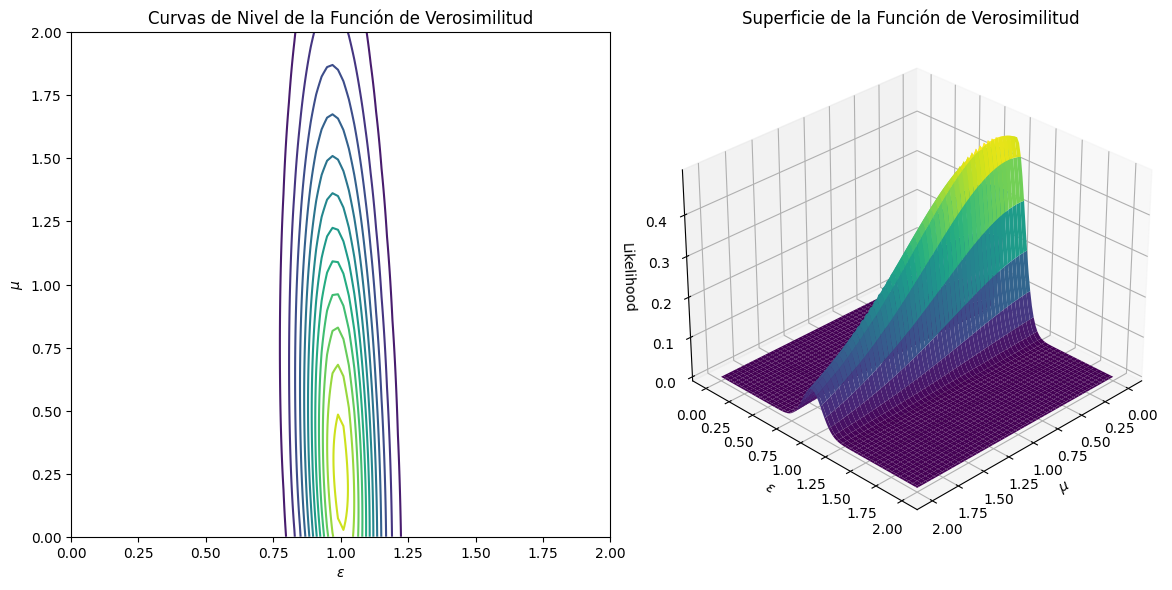

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

n = 10
b = 9
mu_s = 4


mu_values = np.linspace(0, 2, 100)
epsilon_values = np.linspace(0, 2, 100)


mu_grid, epsilon_grid = np.meshgrid(mu_values, epsilon_values)
likelihood = np.zeros_like(mu_grid)


for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        mu = mu_grid[i, j]
        epsilon = epsilon_grid[i, j]
        poisson_term = poisson.pmf(n, mu * mu_s + epsilon * b)
        gaussian_term = norm.pdf(epsilon, loc=1, scale=0.1)
        likelihood[i, j] = poisson_term * gaussian_term


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
contour = plt.contour(epsilon_grid, mu_grid, likelihood, levels=15, cmap='viridis')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mu$')
plt.title('Curvas de Nivel de la Función de Verosimilitud')
plt.xlim(0, 2)
plt.ylim(0, 2)

ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(mu_grid, epsilon_grid, likelihood, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\epsilon$')
ax.set_zlabel('Likelihood')
ax.set_title('Superficie de la Función de Verosimilitud')
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()


Estimación de μ: 0.478 ± 0.289
Estimación de ε: 0.993 ± 0.056


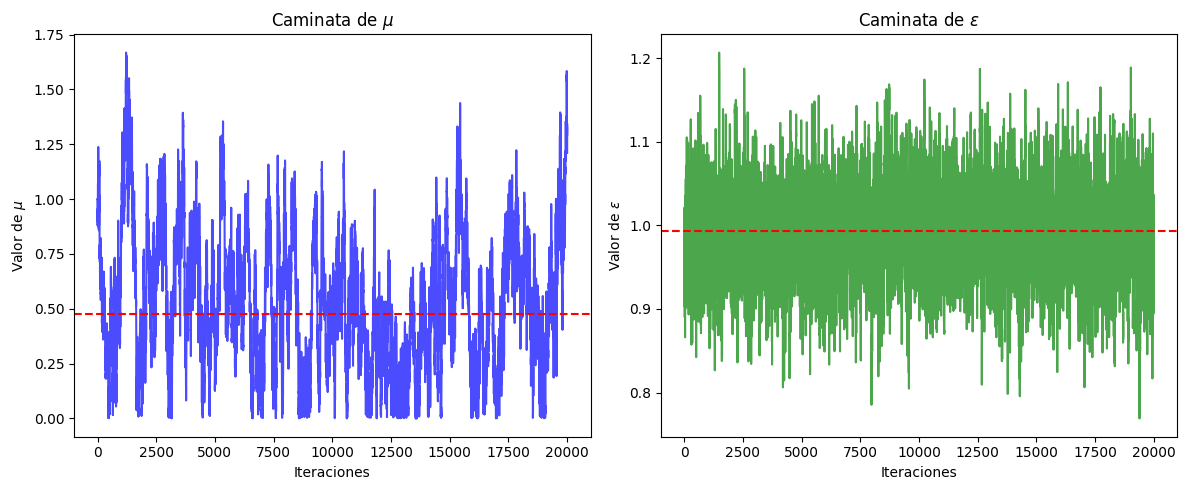

Conclusión: Los datos están bien descritos por la hipótesis de no existencia extraterrestre.


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm
import random

# Datos y parámetros iniciales
Data = np.array([10, 20, 5])
bkg = np.array([6, 15, 10])
Signal = np.array([2, 10, 3])
sigma = 0.1


def likelihood_channel(mu, epsilon, n, s, b):
    poisson_term = poisson.pmf(n, mu * s + epsilon * b)
    gaussian_term = norm.pdf(epsilon, loc=1, scale=sigma)
    return poisson_term * gaussian_term

def joint_likelihood(mu, epsilon, data, signal, bkg):
    likelihood = 1
    for i in range(len(data)):
        likelihood *= likelihood_channel(mu, epsilon, data[i], signal[i], bkg[i])
    return likelihood

def log_joint_likelihood(mu, epsilon, data, signal, bkg):
    log_likelihood = 0
    for i in range(len(data)):
        poisson_term = poisson.pmf(data[i], mu * signal[i] + epsilon * bkg[i])
        gaussian_term = norm.pdf(epsilon, loc=1, scale=sigma)
        log_likelihood += np.log(poisson_term * gaussian_term)
    return log_likelihood

def metropolis_hastings(data, signal, bkg, mu_start, epsilon_start, n_iter=20000):
    mu_current = mu_start
    epsilon_current = epsilon_start
    log_likelihood_current = log_joint_likelihood(mu_current, epsilon_current, data, signal, bkg)

    mu_values = [mu_current]
    epsilon_values = [epsilon_current]

    for i in range(n_iter):

        mu_proposal = np.abs(np.random.normal(mu_current, 0.05)) # Evita valores negativos
        epsilon_proposal = np.abs(np.random.normal(epsilon_current, 0.05)) # Evita valores negativos

        if 0 <= mu_proposal <= 3 and 0.5 <= epsilon_proposal <= 1.5:
            # Calcula log-verosimilitud para la propuesta
            log_likelihood_proposal = log_joint_likelihood(mu_proposal, epsilon_proposal, data, signal, bkg)

            # Acepta o rechaza la propuesta
            acceptance_ratio = np.exp(log_likelihood_proposal - log_likelihood_current)
            if random.uniform(0, 1) < acceptance_ratio:
                mu_current, epsilon_current = mu_proposal, epsilon_proposal
                log_likelihood_current = log_likelihood_proposal

        mu_values.append(mu_current)
        epsilon_values.append(epsilon_current)

    return np.array(mu_values), np.array(epsilon_values)

mu_start, epsilon_start = 1.0, 1.0
mu_values, epsilon_values = metropolis_hastings(Data, Signal, bkg, mu_start, epsilon_start)


mu_estimate = np.mean(mu_values[int(0.5*len(mu_values)):])  # Media de la segunda mitad de la cadena
epsilon_estimate = np.mean(epsilon_values[int(0.5*len(epsilon_values)):])
mu_std = np.std(mu_values[int(0.5*len(mu_values)):])
epsilon_std = np.std(epsilon_values[int(0.5*len(epsilon_values)):])

print(f"Estimación de μ: {mu_estimate:.3f} ± {mu_std:.3f}")
print(f"Estimación de ε: {epsilon_estimate:.3f} ± {epsilon_std:.3f}")


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mu_values, color='blue', alpha=0.7)
plt.axhline(mu_estimate, color='red', linestyle='--')
plt.xlabel("Iteraciones")
plt.ylabel("Valor de $\mu$")
plt.title("Caminata de $\mu$")

plt.subplot(1, 2, 2)
plt.plot(epsilon_values, color='green', alpha=0.7)
plt.axhline(epsilon_estimate, color='red', linestyle='--')
plt.xlabel("Iteraciones")
plt.ylabel("Valor de $\epsilon$")
plt.title("Caminata de $\epsilon$")

plt.tight_layout()
plt.show()

if mu_estimate < 0.5:
    print("Conclusión: Los datos están bien descritos por la hipótesis de no existencia extraterrestre.")
else:
    print("Conclusión: Existe evidencia para considerar la posible existencia de una señal extraterrestre.")
